<a href="https://colab.research.google.com/github/Nidzoki/PMFSTIntroToDS/blob/main/w5/05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### 2025./2026.

# UVOD U PODATKOVNU ZNANOST
## **Domaća zadaća  5**
#### Zadaci za samostalan rad

</div>

## **Podaci**

**PISA** (Program za međunarodnu procjenu učenika) je međunarodni skup podataka koji prikuplja OECD (Organizacija za ekonomsku suradnju i razvoj)
* sadrži informacije o rezultatima učenika u području matematike, čitanja i znanosti, uz prikupljanje dodatnih podataka o socioekonomskim uvjetima, demografiji, obrazovnim pristupima i školskim okruženjima ([Student Performance Data](https://archive.ics.uci.edu/dataset/320/student+performance))
* podaci se mogu učitati kroz Python




In [1]:
# instalacija paketa
!pip install ucimlrepo

In [2]:
#učitavanje paketa
from ucimlrepo import fetch_ucirepo

# dohvaćanje skupa podataka
student_performance = fetch_ucirepo(id=320)

# podaci (pandas dataframe)
df_student_performance = student_performance.data.original

# **Zadatak 1.**

Izdvojite u dva zasebna `DataFrame`-a podatke za muškarce i žene (jedan za muškarce, jedan za žene).

> *Provjerite jesu li to jedine dvije opcije u stupcu koji označava spol.*


* Koliko ima podataka u svakom `DataFrame`-u? (broj stupaca i redaka)
* Koja je prosječna vrijednost i standardna devijacija ocjena u stupcu *G3* (ocjena na kraju godine), pojedinačno za svaki spol? (zaokruženo na 2 decimale)
* Vizualizirajte distribuciju ocjena *G3* za svaki od spolova.

In [3]:
print("Vrijednosti koje se pojavljuju u stupcu ", df_student_performance['sex'].value_counts())

Vrijednosti koje se pojavljuju u stupcu  sex
F    383
M    266
Name: count, dtype: int64


In [4]:
male = df_student_performance[df_student_performance['sex'] == "M"]
female = df_student_performance[df_student_performance['sex'] == 'F']

In [5]:
print("Muški dataframe: ", male.shape[0])
print("Ženski dataframe: ", female.shape[0])

Muški dataframe:  266
Ženski dataframe:  383


In [6]:
print("M prosjek: ", round(male['G3'].mean(), 2))
print("Ž prosjek: ", round(female['G3'].mean(), 2))

print("M std dev: ", round(male['G3'].std(), 2))
print("Ž std dev: ", round(female['G3'].std(), 2))

M prosjek:  11.41
Ž prosjek:  12.25
M std dev:  3.32
Ž std dev:  3.12


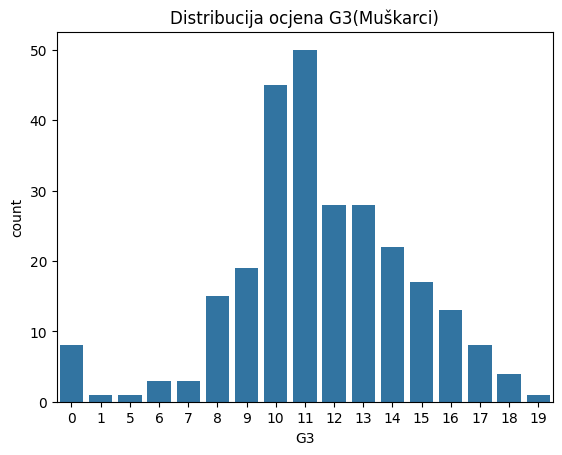

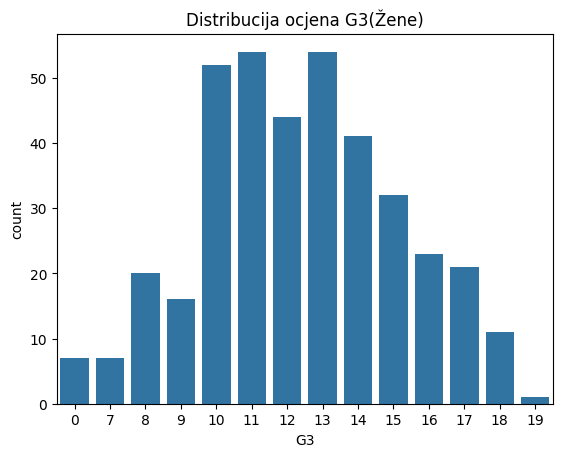

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(male['G3'].value_counts())
plt.title('Distribucija ocjena G3(Muškarci)')
plt.show()
sns.barplot(female['G3'].value_counts())
plt.title('Distribucija ocjena G3(Žene)')
plt.show()

# **Zadatak 2.**
> **OBAVEZNO:** Izvadite slučajan uzorak iz DataFrame-a koristeći [`pandas.DataFrame.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html), te obavezno stavite vrijednost parametra ***random_state = 77*** prije generiranja nasumičnog uzorka.

Izdvojite uzorak od po 30 jedinki iz svakog od gornjih `DataFrame`-ova (30 žena i 30 muškaraca).
* Koje su prosječna vrijednosti i standardna devijacija ocjena u stupcu *G3* (ocjena na kraju godine), u uzorku za svaki spol? (zaokruženo na 2 decimale)
* Vizualizirajte distribucije uzoraka.
* Usporedite stvarne vrijednosti populacije s vrijednostima uzoraka za srednju vrijednosti i standardnu devijaciju. (tj. izračunajte apsolutnu vrijednost razlike).

In [8]:
import pandas as pd

male_sample = pd.DataFrame.sample(male, random_state=77, n=30)
female_sample = pd.DataFrame.sample(female, random_state=77, n=30)

In [9]:
print("M sample prosjek: ", round(male_sample['G3'].mean(), 2))
print("Ž sample prosjek: ", round(female_sample['G3'].mean(), 2))

print("M sample std dev: ", round(male_sample['G3'].std(), 2))
print("Ž sample std dev: ", round(female_sample['G3'].std(), 2))

M sample prosjek:  11.13
Ž sample prosjek:  12.77
M sample std dev:  4.38
Ž sample std dev:  3.65


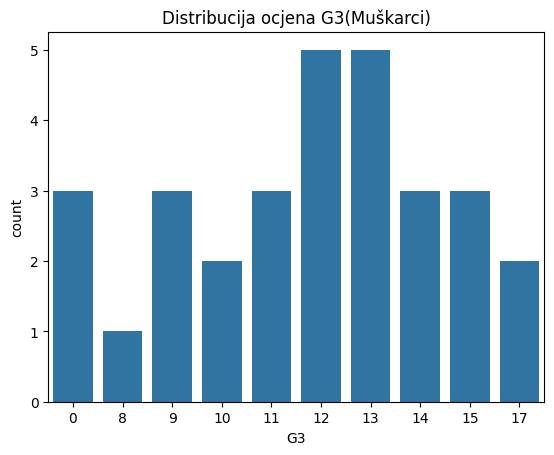

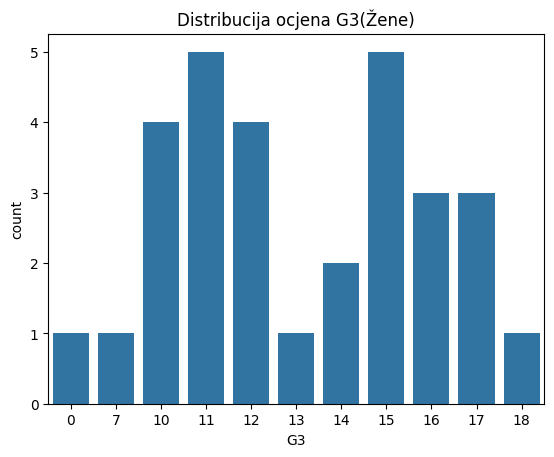

In [10]:
sns.barplot(male_sample['G3'].value_counts())
plt.title('Distribucija ocjena G3(Muškarci)')
plt.show()
sns.barplot(female_sample['G3'].value_counts())
plt.title('Distribucija ocjena G3(Žene)')
plt.show()

In [11]:
print("Razlika prosjeka (Muškarci): ", abs(round(male['G3'].mean() - male_sample['G3'].mean(), 2)))
print("Razlika prosjeka (Žene): ", abs(round(male['G3'].mean() - male_sample['G3'].mean(), 2)))

print("Razlika std dev (Muškarci): ", abs(round(female['G3'].std() - female_sample['G3'].std(), 2)))
print("Razlika std dev (Žene): ", abs(round(female['G3'].std() - female_sample['G3'].std(), 2)))

Razlika prosjeka (Muškarci):  0.27
Razlika prosjeka (Žene):  0.27
Razlika std dev (Muškarci):  0.52
Razlika std dev (Žene):  0.52


# **Zadatak 3.**

> **OBAVEZNO:** Prilikom generiranja slučajnih uzoraka koristite [`pandas.DataFrame.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html), te koristite vrijednosti iz danog niza **random_seeds** za vrijednost parametra **random_state**.

Izgenerirajte 20 uzoraka za svaki spol koji sadrže po 100 jedinki (100 žena i 100 muškaraca) te promotrite varijabilnost procjene.

* Koje su prosječna vrijednosti i standardna devijacija ocjena *G3* (ocjena na kraju godine) u svakom uzorku? (zaokruženo na 2 decimale)
* Vizualizirajte odnos prosječnih vrijednosti uzorka i populacije, te odnos standardnih devijacija uzorka i populacije, za svaki spol.

In [12]:
random_seeds = [15, 44, 67, 7, 98, 51, 96, 74, 77, 31, 28, 73, 60, 94, 17, 49, 1, 4, 6, 63]

male_random_samples = []
female_random_samples = []

for i in random_seeds:
  male_random_samples.append(male.sample(n=20, random_state=i))
  female_random_samples.append(female.sample(n=20, random_state=i))

In [13]:
print("Prosjecne vrijednosti (M): \n", [float(round(x['G3'].mean(), 2)) for x in male_random_samples])
print("Prosjecne vrijednosti (Ž): \n", [float(round(x['G3'].mean(), 2)) for x in female_random_samples])

print("Std dev (M): \n", [float(round(x['G3'].std(), 2)) for x in male_random_samples])
print("Std dev (Ž): \n", [float(round(x['G3'].std(), 2)) for x in female_random_samples])

Prosjecne vrijednosti (M): 
 [10.4, 11.25, 11.45, 11.4, 10.7, 12.55, 11.55, 11.1, 10.8, 11.8, 11.85, 11.8, 11.85, 11.35, 10.35, 11.25, 11.4, 11.1, 11.5, 12.4]
Prosjecne vrijednosti (Ž): 
 [12.6, 12.4, 12.5, 12.45, 12.25, 11.85, 13.45, 13.25, 12.25, 12.6, 11.7, 11.85, 12.5, 11.7, 12.25, 11.8, 12.6, 11.4, 13.05, 11.75]
Std dev (M): 
 [4.42, 2.69, 2.39, 3.57, 4.65, 2.96, 2.26, 2.1, 5.02, 2.76, 4.0, 3.99, 3.8, 3.38, 4.21, 4.4, 2.68, 4.75, 3.8, 2.35]
Std dev (Ž): 
 [3.76, 2.96, 2.76, 2.44, 2.49, 3.82, 3.33, 3.01, 3.86, 2.74, 3.83, 2.18, 2.63, 3.2, 2.71, 2.69, 4.27, 2.39, 1.99, 3.54]


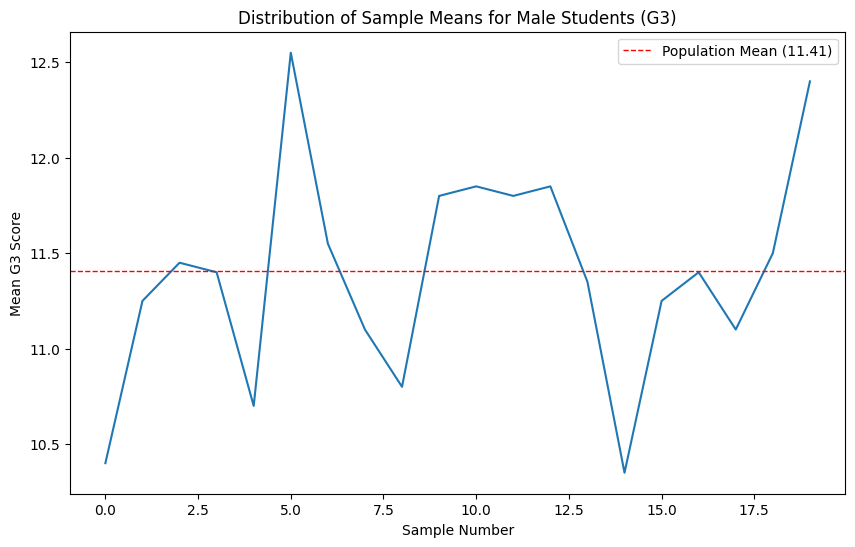

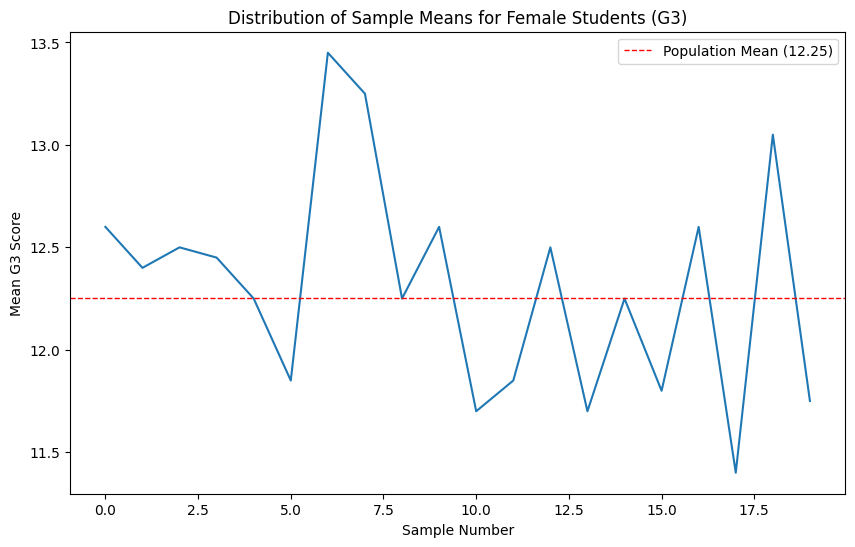

In [18]:
male_means = [x['G3'].mean() for x in male_random_samples]
male_plot_data = pd.DataFrame({
    'Sample Number': range(len(male_means)),
    'Mean G3 Score': male_means
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=male_plot_data, x='Sample Number', y='Mean G3 Score')
plt.axhline(male['G3'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Population Mean ({male["G3"].mean():.2f})')
plt.title('Distribution of Sample Means for Male Students (G3)')
plt.xlabel('Sample Number')
plt.ylabel('Mean G3 Score')
plt.legend()
plt.show()

female_means = [x['G3'].mean() for x in female_random_samples]
female_plot_data = pd.DataFrame({
    'Sample Number': range(len(female_means)),
    'Mean G3 Score': female_means
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=female_plot_data, x='Sample Number', y='Mean G3 Score')
plt.axhline(female['G3'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Population Mean ({female["G3"].mean():.2f})')
plt.title('Distribution of Sample Means for Female Students (G3)')
plt.xlabel('Sample Number')
plt.ylabel('Mean G3 Score')
plt.legend()
plt.show()

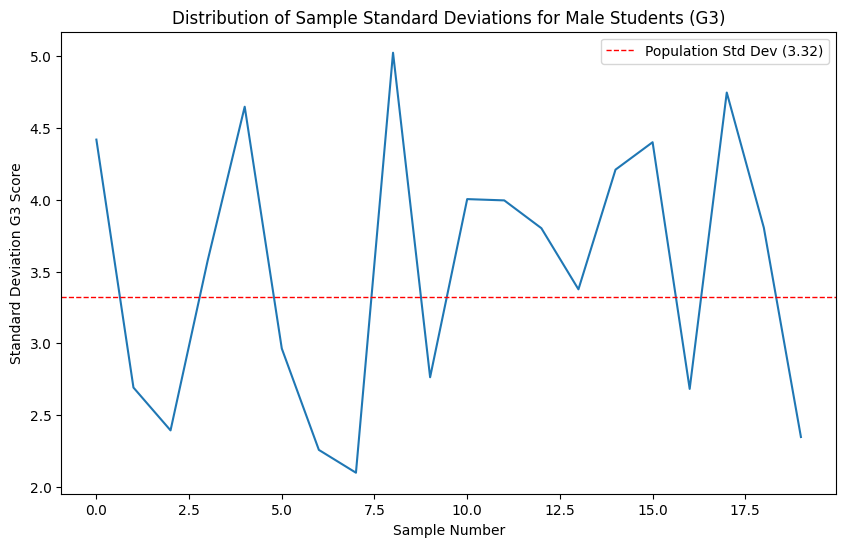

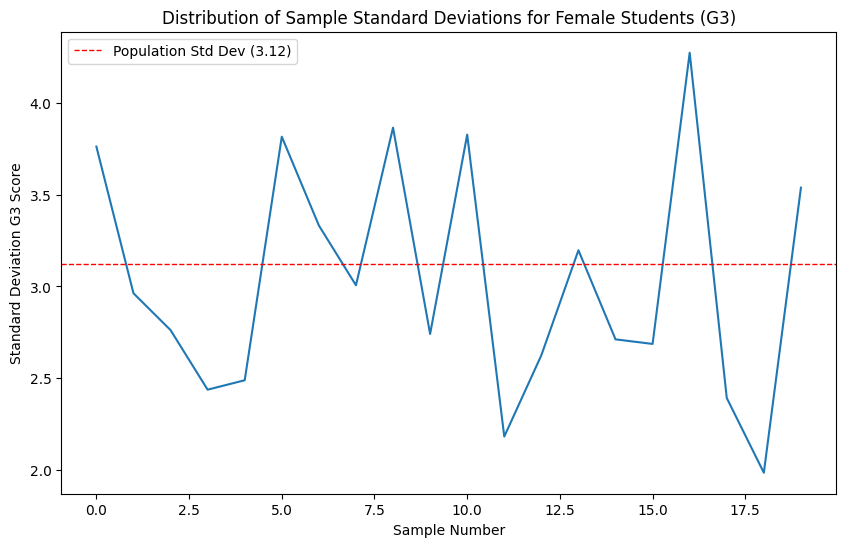

In [19]:
male_stds = [x['G3'].std() for x in male_random_samples]
male_std_plot_data = pd.DataFrame({
    'Sample Number': range(len(male_stds)),
    'Standard Deviation G3 Score': male_stds
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=male_std_plot_data, x='Sample Number', y='Standard Deviation G3 Score')
plt.axhline(male['G3'].std(), color='red', linestyle='dashed', linewidth=1, label=f'Population Std Dev ({male["G3"].std():.2f})')
plt.title('Distribution of Sample Standard Deviations for Male Students (G3)')
plt.xlabel('Sample Number')
plt.ylabel('Standard Deviation G3 Score')
plt.legend()
plt.show()

female_stds = [x['G3'].std() for x in female_random_samples]
female_std_plot_data = pd.DataFrame({
    'Sample Number': range(len(female_stds)),
    'Standard Deviation G3 Score': female_stds
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=female_std_plot_data, x='Sample Number', y='Standard Deviation G3 Score')
plt.axhline(female['G3'].std(), color='red', linestyle='dashed', linewidth=1, label=f'Population Std Dev ({female["G3"].std():.2f})')
plt.title('Distribution of Sample Standard Deviations for Female Students (G3)')
plt.xlabel('Sample Number')
plt.ylabel('Standard Deviation G3 Score')
plt.legend()
plt.show()

# **Zadatak 4.**
> **OBAVEZNO:** Prilikom generiranja slučajnih uzoraka koristite [`pandas.DataFrame.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html), te koristite vrijednosti iz danog niza **random_seeds_1000** za vrijednost parametra **random_state**.

Vizualizirajte distribuciju procjenitelja srednje vrijednosti stupca *G3* za svaki spol:
* Napravite 1000 uzoraka od po 50 jedinki za svaki spol.
* Izračunajte srednje vrijednosti za svaki od tih uzoraka, te dobivenu slučajnu varijablu vizualizirajte.
> Vizualno provjerite jesu li distribucije normalne.

In [20]:
random_seeds_1000 = [94, 45, 57, 31, 44, 17, 79, 12, 9, 49, 84, 49, 1, 10, 74, 12, 19, 69, 28, 26, 74, 20, 32, 55, 41, 94, 27, 80, 94, 84, 51, 39, 89, 21, 28, 98, 56, 47, 68, 63, 41, 9, 91, 77, 64, 24, 35, 65, 72, 40, 31, 68, 54, 67, 94, 67, 56, 78, 58, 3, 61, 83, 9, 62, 35, 9, 75, 18, 52, 95, 58, 2, 64, 46, 52, 27, 58, 67, 81, 23, 50, 94, 17, 84, 53, 51, 69, 74, 63, 11, 38, 68, 24, 5, 66, 57, 30, 84, 88, 50, 88, 75, 84, 6, 71, 17, 36, 33, 4, 79, 92, 95, 89, 7, 70, 89, 64, 60, 96, 89, 4, 22, 29, 85, 53, 65, 5, 99, 92, 12, 98, 16, 70, 88, 59, 29, 17, 11, 31, 20, 1, 78, 23, 48, 54, 70, 2, 10, 54, 24, 21, 13, 49, 12, 62, 61, 93, 8, 55, 49, 90, 13, 33, 68, 71, 98, 58, 14, 76, 35, 14, 78, 18, 39, 34, 94, 94, 92, 65, 93, 75, 31, 37, 63, 31, 28, 52, 39, 93, 26, 55, 29, 30, 38, 7, 21, 3, 44, 63, 83, 41, 59, 61, 77, 33, 19, 71, 9, 7, 31, 62, 67, 15, 38, 72, 94, 93, 41, 46, 44, 16, 18, 80, 82, 42, 94, 9, 51, 26, 68, 81, 61, 75, 45, 88, 12, 41, 90, 54, 88, 10, 43, 66, 42, 86, 12, 45, 26, 6, 5, 61, 40, 45, 15, 55, 19, 87, 59, 22, 71, 79, 93, 32, 95, 84, 45, 44, 60, 6, 65, 64, 96, 9, 46, 31, 54, 18, 94, 33, 29, 12, 18, 84, 100, 22, 14, 70, 40, 14, 70, 21, 1, 85, 61, 39, 65, 86, 40, 92, 47, 82, 6, 80, 81, 100, 21, 69, 46, 33, 11, 40, 21, 9, 39, 62, 42, 74, 37, 71, 35, 58, 85, 22, 96, 7, 10, 35, 65, 11, 69, 47, 58, 22, 45, 62, 98, 41, 86, 35, 90, 78, 29, 78, 50, 28, 83, 74, 65, 85, 88, 48, 31, 80, 92, 62, 4, 85, 95, 97, 48, 23, 14, 32, 76, 74, 37, 88, 44, 54, 17, 5, 39, 64, 77, 34, 98, 38, 47, 31, 53, 39, 9, 32, 20, 98, 53, 17, 81, 86, 9, 81, 77, 42, 26, 87, 50, 68, 39, 63, 39, 6, 13, 95, 11, 4, 52, 36, 91, 11, 12, 56, 73, 42, 79, 23, 29, 4, 80, 22, 91, 90, 79, 35, 43, 60, 9, 9, 96, 91, 4, 62, 47, 9, 89, 24, 96, 9, 42, 9, 53, 58, 25, 28, 64, 44, 35, 18, 85, 99, 44, 95, 3, 88, 9, 57, 93, 51, 25, 84, 60, 42, 27, 54, 60, 12, 43, 56, 96, 20, 7, 21, 44, 46, 19, 76, 44, 44, 100, 87, 36, 20, 89, 12, 66, 71, 82, 69, 5, 46, 16, 50, 81, 100, 67, 81, 31, 86, 34, 86, 82, 24, 96, 23, 63, 10, 12, 83, 82, 31, 28, 70, 68, 67, 21, 42, 6, 67, 28, 56, 90, 23, 92, 40, 91, 8, 54, 2, 47, 37, 86, 27, 51, 100, 28, 54, 88, 33, 43, 52, 27, 30, 47, 94, 79, 46, 22, 70, 75, 21, 99, 91, 49, 71, 41, 99, 41, 74, 41, 81, 7, 30, 87, 59, 65, 62, 64, 42, 90, 48, 25, 79, 74, 47, 22, 74, 1, 97, 19, 39, 95, 38, 64, 80, 31, 31, 50, 77, 49, 13, 30, 32, 31, 86, 61, 99, 75, 2, 59, 68, 86, 43, 7, 61, 21, 37, 44, 97, 77, 30, 65, 97, 99, 70, 98, 93, 55, 46, 40, 91, 10, 36, 39, 98, 90, 3, 93, 52, 63, 11, 80, 89, 36, 59, 25, 86, 25, 85, 14, 45, 40, 98, 54, 99, 13, 85, 54, 34, 68, 93, 46, 85, 55, 76, 30, 90, 72, 36, 87, 7, 68, 52, 29, 10, 18, 80, 78, 97, 26, 91, 15, 69, 55, 54, 30, 65, 79, 15, 72, 23, 83, 24, 6, 4, 50, 96, 22, 66, 42, 44, 13, 45, 53, 88, 90, 93, 13, 94, 66, 72, 46, 77, 61, 60, 77, 98, 96, 83, 93, 75, 7, 18, 83, 43, 16, 76, 80, 9, 70, 98, 83, 4, 1, 99, 4, 1, 24, 52, 17, 36, 21, 61, 21, 37, 28, 65, 27, 46, 65, 98, 63, 6, 50, 72, 83, 81, 74, 33, 38, 82, 57, 75, 62, 68, 8, 17, 87, 99, 48, 6, 100, 14, 17, 25, 55, 80, 31, 43, 58, 43, 22, 54, 7, 17, 78, 62, 25, 3, 97, 87, 52, 60, 1, 3, 56, 47, 56, 1, 6, 75, 77, 47, 48, 55, 14, 61, 74, 7, 99, 42, 94, 52, 3, 2, 56, 18, 51, 56, 37, 58, 17, 67, 62, 10, 80, 17, 59, 70, 81, 2, 65, 4, 31, 98, 86, 41, 52, 85, 70, 58, 66, 36, 73, 47, 41, 88, 88, 89, 60, 87, 57, 47, 87, 70, 16, 98, 20, 20, 96, 73, 81, 75, 19, 67, 65, 80, 63, 9, 31, 99, 58, 44, 99, 19, 27, 65, 22, 96, 47, 52, 24, 48, 35, 79, 30, 20, 98, 61, 67, 1, 9, 5, 15, 56, 46, 32, 67, 63, 96, 81, 37, 20, 95, 41, 78, 77, 16, 46, 37, 71, 95, 79, 5, 5, 9, 2, 47, 72, 15, 49, 54, 84, 3, 1, 34, 75, 4, 63, 77, 5, 37, 66, 20, 63, 46, 7, 61, 68, 64, 77, 11, 79, 32, 30, 2, 10, 34, 83, 55, 80, 66, 31, 35, 93, 55, 84, 30, 50, 40, 61, 42, 87, 77, 39, 71, 97, 88, 75, 6, 69, 69, 82, 30, 65, 80, 7, 84, 58, 23, 12, 59, 100, 10, 65, 3, 24, 11, 2, 26, 7, 40, 47, 57, 46, 39, 100, 59, 81, 42, 30, 74, 74, 40, 45, 8, 19, 98, 24, 76, 5, 63]

In [24]:
male_g3_means = []
female_g3_means = []

for random_seed in random_seeds_1000:
    male_sample_50 = male.sample(n=50, random_state=random_seed)
    male_g3_means.append(male_sample_50['G3'].mean())

    female_sample_50 = female.sample(n=50, random_state=random_seed)
    female_g3_means.append(female_sample_50['G3'].mean())

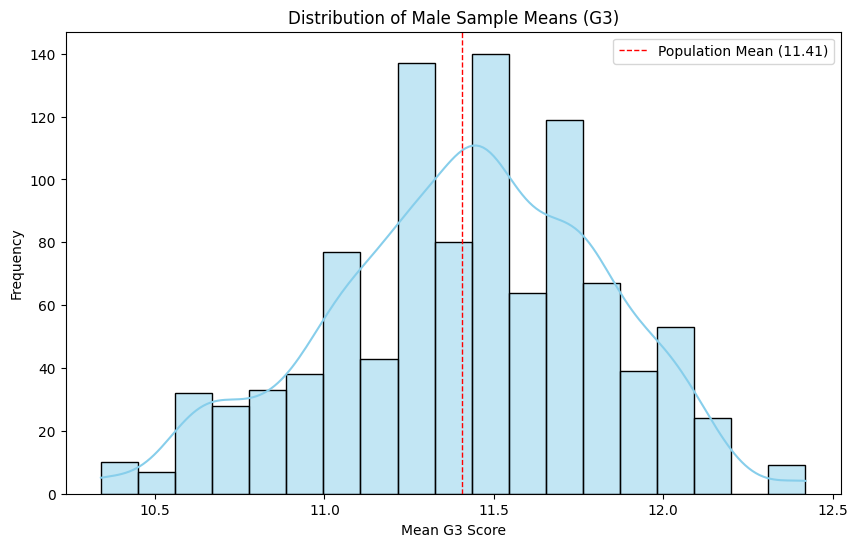

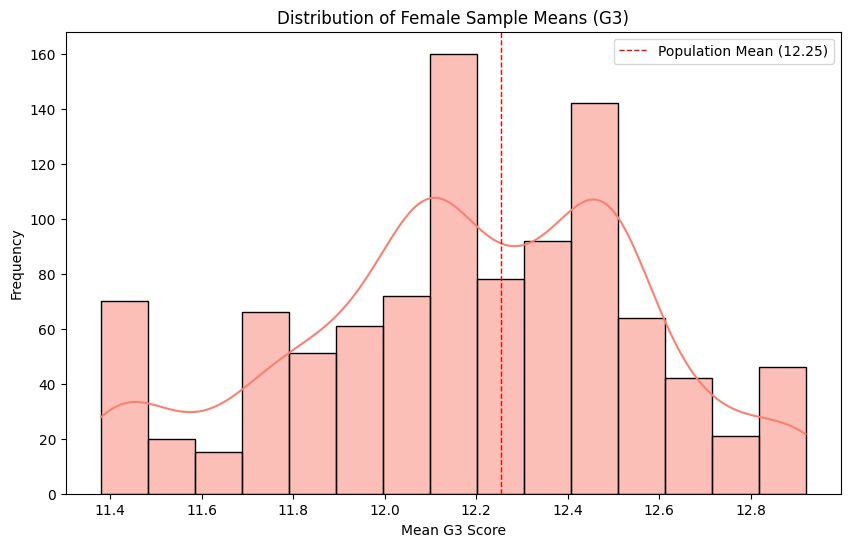

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(male_g3_means, kde=True, color='skyblue')
plt.title('Distribution of Male Sample Means (G3)')
plt.xlabel('Mean G3 Score')
plt.ylabel('Frequency')
plt.axvline(male['G3'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Population Mean ({male["G3"].mean():.2f})')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(female_g3_means, kde=True, color='salmon')
plt.title('Distribution of Female Sample Means (G3)')
plt.xlabel('Mean G3 Score')
plt.ylabel('Frequency')
plt.axvline(female['G3'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Population Mean ({female["G3"].mean():.2f})')
plt.legend()
plt.show()

# **Zadatak 5.**
> **OBAVEZNO:** Generirajte slučajan uzorak iz DataFrame-a koristeći [`pandas.DataFrame.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html), te obavezno stavite vrijednost parametra ***random_state = 77*** prije generiranja nasumičnog uzorka.

Izračunajte intervale pouzdanosti za srednju vrijednost ocjena *G1*, *G2*, i *G3* (u populaciji) svakog spola koristeći uzorak od 75 muškaraca i 75 žena. Koristite pouzdanosti: 90%, 95%, 99%.

In [27]:
male_sample_75 = male.sample(n=75, random_state=77)
female_sample_75 = female.sample(n=75, random_state=77)

In [28]:
from scipy import stats
import numpy as np

def calculate_confidence_interval(data, column, confidence_level):
    mean = data[column].mean()
    std_err = stats.sem(data[column])
    df = len(data[column]) - 1
    interval = stats.t.interval(confidence_level, df, loc=mean, scale=std_err)
    return interval

confidence_levels = [0.90, 0.95, 0.99]
grade_columns = ['G1', 'G2', 'G3']

print("Confidence Intervals for Male Sample (75 students):\n")
for col in grade_columns:
    print(f"  Column: {col}")
    for cl in confidence_levels:
        lower, upper = calculate_confidence_interval(male_sample_75, col, cl)
        print(f"    {int(cl*100)}% CI: ({lower:.2f}, {upper:.2f})")
    print("\n")

print("Confidence Intervals for Female Sample (75 students):\n")
for col in grade_columns:
    print(f"  Column: {col}")
    for cl in confidence_levels:
        lower, upper = calculate_confidence_interval(female_sample_75, col, cl)
        print(f"    {int(cl*100)}% CI: ({lower:.2f}, {upper:.2f})")
    print("\n")

Confidence Intervals for Male Sample (75 students):

  Column: G1
    90% CI: (10.63, 11.71)
    95% CI: (10.53, 11.82)
    99% CI: (10.32, 12.03)


  Column: G2
    90% CI: (10.71, 11.90)
    95% CI: (10.60, 12.02)
    99% CI: (10.37, 12.25)


  Column: G3
    90% CI: (10.73, 12.18)
    95% CI: (10.59, 12.32)
    99% CI: (10.30, 12.60)


Confidence Intervals for Female Sample (75 students):

  Column: G1
    90% CI: (11.27, 12.33)
    95% CI: (11.16, 12.44)
    99% CI: (10.95, 12.65)


  Column: G2
    90% CI: (11.61, 12.79)
    95% CI: (11.50, 12.90)
    99% CI: (11.27, 13.13)


  Column: G3
    90% CI: (11.83, 13.10)
    95% CI: (11.71, 13.22)
    99% CI: (11.46, 13.47)


